# GROUP WORK PROJECT #1  
## MScFE 600: Financial Data  
**Group Number:** 8952  

---

### Contributors

| FULL LEGAL NAME                    | LOCATION (COUNTRY) | EMAIL ADDRESS                  |
|------------------------------------|--------------------|--------------------------------|
| Desire Bikorimana                 | Rwanda             | bikorimanadesire@yahoo.com     |
| Cherukumilli Satya Sri Hari Charan| India              | haricharan.nitt@gmail.com      |
| Bismark Mawuenyega Agbemafle      | Ghana              | agbemaflebismark@gmail.com     |

---

## Task 1: Data Quality

### a. Example of Poor Quality Structured Data

Poor quality structured data can take many forms. Consider a **CSV file of loan records** where interest rates are inconsistently formatted—some listed as decimals (e.g., `0.5`) and others as percentages (e.g., `5%`). Additionally, critical columns like `Loan_received_date` and `amount_received` may have missing or improperly formatted values. Similarly, a **sales database** may contain entries with invalid dates (e.g., `"2023-02-30"`), missing customer IDs, and duplicate transaction records (Kimball & Caserta, 2004).

### b. Recognizing Poor Quality in Structured Data

Data quality issues in such structured datasets can be identified using the following criteria:

1. **Validity**: Values like `"2023-02-30"` are invalid since February has only 28 or 29 days (ISO 8000, 2023).
2. **Completeness**: Missing key fields like customer IDs or loan amounts hinder analysis.
3. **Consistency**: Mixing formats (fractions vs percentages) and duplicate records distort analytics and financial metrics.
4. **Metadata Alignment**: Numeric fields may contain non-numeric values, violating expected data types (Consoli et al.).

### c. Example of Poor Quality Unstructured Data

An example of poor quality unstructured data is a **collection of financial news articles** scraped from various websites. These may be cluttered with HTML tags, navigation links, inconsistent formatting, typos, and even irrelevant advertisements. Alternatively, a **corpus of customer feedback emails** may include slang, spelling errors, and incomplete sentences (Batini et al., 2009).

### d. Challenges in Assessing Unstructured Data

Unstructured data often lacks key quality attributes:

1. **Standardization**: Free-form text varies in format, making automated analysis challenging (IBM, 2021).
2. **Accuracy**: Typos, slang (e.g., `"It's gr8!"`), and formatting issues lead to misinterpretation.
3. **Relevance**: HTML artifacts and unrelated content introduce noise and dilute actionable insights.
4. **Structure**: Lack of clear delimiters between useful and irrelevant content hampers natural language processing tasks (Consoli et al.).

---

## Task 2: Yield Curve Modeling — Nelson-Siegel and Cubic Spline

### Objective
The objective of this task is to model the term structure of interest rates using two techniques: the Nelson-Siegel parametric model and a non-parametric cubic spline interpolation. These models will be applied to Indian government bond yields to analyze the shape of the yield curve and assess model accuracy.

### Dataset Description

To model the Indian yield curve, we utilize monthly yield data from the **Reserve Bank of India (RBI)** sourced from their [Government Securities Market database](https://data.rbi.org.in/DBIE/#/dbie/reports/Statistics/Financial%20Market/Government%20Securities%20Market).

We use two primary datasets:

1. **HBS Table No. 180** – *Yield of SGL Transactions in Government Dated Securities for Various Maturities*  
   - Frequency: Monthly  
   - Includes medium- and long-term yields ranging from 1 to 30 years  
   - Source file: `HBS Table No. 180 _ Yield of SGL Transactions in Government Dated Securiites for Various Maturities.txt`

This allows us to construct a cross-sectional yield curve with maturities spanning from **1 to 30 years** — ideal for fitting both the **Nelson-Siegel model** and **Cubic Spline interpolation**.

We select a **single representative month** from the latest available data to focus on the shape of the yield curve at that point in time, aligning with the project’s goal of static curve modeling.

### Data Export and Manual Formatting

The monthly yield data for government dated securities for the financial year **2024–25** was extracted from the RBI’s HBS Table No. 180. We limited the data to **April 2024 to March 2025**, covering maturities from **1 year to 30 years**.

The extracted data was exported to a CSV file (`yield_curve_2024_25.csv`) and then manually formatted to relabel the column headers to reflect full month-year labels (e.g., `"Apr 2024"`, `"May 2024"`, ..., `"Mar 2025"`). The final exported file is named:

> `yield_curve_2024_25.csv`

No additional cleaning steps such as `dropna()` or imputation were necessary, as the dataset did not contain missing values in the selected block.

This clean, structured dataset is now ready for use in **Nelson-Siegel** and **Cubic Spline** yield curve fitting.

### Modeling Approach

**Nelson-Siegel Model**: Fit a parametric model using the functional form:

$$
y(\tau) = \beta_0 + \beta_1 \frac{1 - e^{-\lambda \tau}}{\lambda \tau} + \beta_2 \left( \frac{1 - e^{-\lambda \tau}}{\lambda \tau} - e^{-\lambda \tau} \right)
$$

where:

$$
\tau = \text{time to maturity in years}
$$

$$
\beta_0 = \text{Long-term yield (level)}
$$

$$
\beta_1 = \text{Short-term component (slope)}
$$

$$
\beta_2 = \text{Medium-term curvature}
$$

$$
\lambda = \text{Decay factor controlling the exponential term}
$$

**Cubic Spline Interpolation**: Fit a smooth curve through the yield data using cubic spline interpolation via `scipy.interpolate.make_interp_spline`.

### Evaluation and Interpretation
- Compare the two models using fit metrics such as RMSE or R².
- Plot yield curves to visualize differences in smoothness and fit.
- Discuss the interpretability of parameters in each model and their economic implications.

### Ethical Consideration
We reflect on whether yield curve smoothing introduces bias or obscures important information. The ethical implications of using smoothed models in financial reporting and risk management will be considered.

---

### Importing the CSV File into a DataFrame

We are importing the CSV file located in the project root directory into a pandas DataFrame. This allows us to efficiently manipulate and analyze the data using Python's powerful data analysis library, pandas.

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'yield_curve_2024_25.csv'
yield_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
yield_data.head()

,Maturity,Apr 2024,May 2024,Jun 2024,Jul 2024,Aug 2024,Sep 2024,Oct 2024,Nov 2024,Dec 2024,Jan 2025,Feb 2025,Mar 2025
0,1,7.0735,7.0145,6.9338,6.7992,6.7420,6.6310,6.6261,6.6938,6.6644,6.5840,6.5365,6.4155
1,2,7.1202,7.0055,6.9639,6.8334,6.7555,6.6600,6.6968,6.7023,6.6996,6.5580,6.5614,6.4293
2,3,7.1808,7.0394,6.9800,6.8427,6.7599,6.6680,6.7483,6.6946,6.7043,6.6261,6.5803,6.4375
3,4,7.1930,7.0432,7.0083,6.8393,6.7874,6.6679,6.7629,6.6882,6.7177,6.6325,6.6239,6.4536
4,5,7.1962,7.0387,7.0229,6.8436,6.8048,6.6784,6.7806,6.7432,6.7174,6.6488,6.6534,6.4797


### Nelson-Siegel Model Fitting — March 2025

This code block implements the Nelson-Siegel model to fit the term structure of interest rates observed in **March 2025**. The following steps are performed:

1. **Import Required Libraries:**
   - `numpy` is used for numerical operations such as exponentiation and array manipulation.
   - `matplotlib.pyplot` is used to visualize both observed and fitted yield curves.
   - `scipy.optimize.curve_fit` is used to estimate the model parameters by minimizing the residuals between observed and modeled yields.

2. **Define the Nelson-Siegel Functional Form:**
   The function `nelson_siegel(tau, beta0, beta1, beta2, lambd)` computes the yield at each maturity \( \tau \) using the Nelson-Siegel formula.

3. **Select Observed Data:**
   Yields for the month of **March 2025** are selected from the dataset along with the corresponding maturities (ranging from 1 to 30 years).

4. **Specify Initial Guesses:**

The following initial values are provided for the Nelson-Siegel parameters:

$$
\beta_0 = 6.0 \quad \text{(Level — represents the long-term component)}
$$

$$
\beta_1 = -1.0 \quad \text{(Slope — short-term deviation from the level)}
$$

$$
\beta_2 = 1.0 \quad \text{(Curvature — medium-term hump or dip)}
$$

$$
\lambda = 0.5 \quad \text{(Decay — controls the rate at which slope/curvature diminish)}
$$

5. **Fit the Model:**
   Using `curve_fit`, the function optimizes the parameters to minimize the squared error between the observed and modeled yields.

6. **Extract and Display Parameters:**
   The optimized parameters are extracted and printed for interpretation.

7. **Generate Fitted Curve:**
   The `nelson_siegel` function is re-evaluated using the optimized parameters to generate the fitted yield curve.

8. **Plot Results:**
   A plot is created comparing:
   - The **observed yields** (plotted as discrete points).
   - The **fitted Nelson-Siegel curve** (a continuous line).
   
   This visual comparison helps assess how well the model captures the actual shape of the yield curve for the selected month.

Matplotlib is building the font cache; this may take a moment.


Fitted Parameters: 
Beta0: 7.145719519173111, Beta1: -0.7098038305246168, Beta2: -0.9191077018106922, Lambda: 0.25734228363743034


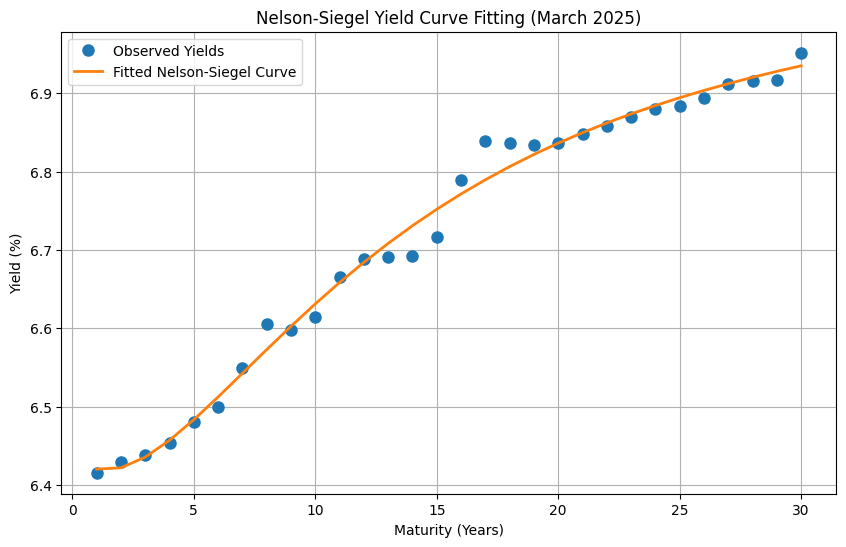

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Nelson-Siegel functional form
def nelson_siegel(tau, beta0, beta1, beta2, lambd):
    term1 = beta0
    term2 = beta1 * (1 - np.exp(-lambd * tau)) / (lambd * tau)
    term3 = beta2 * ((1 - np.exp(-lambd * tau)) / (lambd * tau) - np.exp(-lambd * tau))
    return term1 + term2 + term3

# Select the data for March 2025
maturities = yield_data['Maturity'].values
yields = yield_data['Mar 2025'].values

# Initial parameter guesses for beta0, beta1, beta2, and lambda
initial_params = [6.0, -1.0, 1.0, 0.5]

# Fit the Nelson-Siegel model to the data
params, _ = curve_fit(nelson_siegel, maturities, yields, p0=initial_params)

# Extract the fitted parameters
beta0, beta1, beta2, lambd = params
print(f"Fitted Parameters: \nBeta0: {beta0}, Beta1: {beta1}, Beta2: {beta2}, Lambda: {lambd}")

# Generate fitted yields
fitted_yields = nelson_siegel(maturities, beta0, beta1, beta2, lambd)

# Plot observed vs fitted yields
plt.figure(figsize=(10, 6))
plt.plot(maturities, yields, 'o', label='Observed Yields', markersize=8)
plt.plot(maturities, fitted_yields, '-', label='Fitted Nelson-Siegel Curve', linewidth=2)
plt.title('Nelson-Siegel Yield Curve Fitting (March 2025)')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()

### Cubic Spline Yield Curve Fitting

In this section, we fit a **cubic spline** to the March 2025 yield curve data. Unlike the Nelson-Siegel model, which is parametric and based on economic intuition, a spline is a **non-parametric interpolation method** that passes a smooth curve through all observed data points.

#### What is a Cubic Spline?

A cubic spline is a piecewise polynomial function of degree 3. It constructs a separate cubic polynomial between each pair of adjacent data points (called *knots*) and ensures smoothness and continuity across them.

Formally, for a set of \( n \) data points \( (x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n) \), the cubic spline \( S(x) \) is defined piecewise as:

$$
S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3 \quad \text{for } x \in [x_i, x_{i+1}]
$$


The spline satisfies the following continuity and smoothness conditions at each internal knot:

$$
S_i(x_{i+1}) = S_{i+1}(x_{i+1})
$$

$$
S_i'(x_{i+1}) = S_{i+1}'(x_{i+1})
$$

$$
S_i''(x_{i+1}) = S_{i+1}''(x_{i+1})
$$

#### Why Use Spline Fitting?

- It is **data-driven** and flexible.
- Adapts to the local shape of the yield curve without assuming a global form.
- Useful for modeling term structures with **humps, dips, or kinks** that parametric models might miss.

We use `scipy.interpolate.make_interp_spline()` with \( k = 3 \) to fit a smooth cubic spline to the observed \( (\text{maturity}, \text{yield}) \) pairs for March 2025.

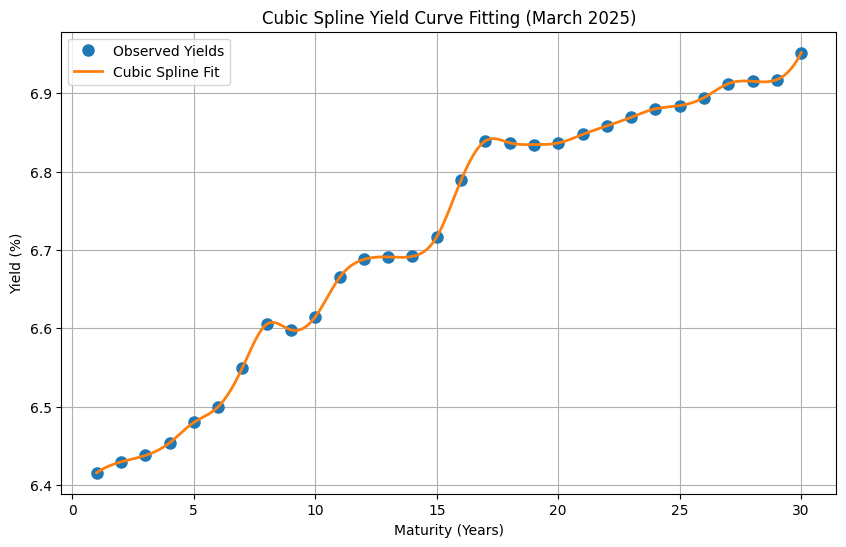

In [9]:
from scipy.interpolate import make_interp_spline

# Create a cubic spline interpolator
spline = make_interp_spline(maturities, yields, k=3)  # k=3 means cubic spline

# Create a dense range of maturities for smooth plotting
maturity_grid = np.linspace(min(maturities), max(maturities), 300)

# Evaluate the spline at each grid point
spline_yields = spline(maturity_grid)

# Plot the spline fit
plt.figure(figsize=(10, 6))
plt.plot(maturities, yields, 'o', label='Observed Yields', markersize=8)
plt.plot(maturity_grid, spline_yields, '-', label='Cubic Spline Fit', linewidth=2)
plt.title('Cubic Spline Yield Curve Fitting (March 2025)')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()

### Model Evaluation: Nelson-Siegel vs Cubic Spline

After fitting both the **Nelson-Siegel** and **Cubic Spline** models to the observed yield curve for March 2025, the next step is to evaluate how well each model reproduces the actual data. This is done using standard regression evaluation metrics to measure the deviation between observed and fitted yields.

We use the following metrics for both models:

#### 1. Root Mean Squared Error (RMSE)

The RMSE measures the average magnitude of the prediction errors. It penalizes larger deviations more heavily:

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \left( y_i^{\text{obs}} - y_i^{\text{fit}} \right)^2 }
$$

This metric is expressed in yield percentage points. A lower RMSE indicates a better fit.

#### 2. Coefficient of Determination (R²)

The \( R^2 \) value measures the proportion of variance in the observed data that is captured by the model:

$$
R^2 = 1 - \frac{ \sum \left( y^{\text{obs}} - y^{\text{fit}} \right)^2 }{ \sum \left( y^{\text{obs}} - \bar{y} \right)^2 }
$$

Where:

$$
y^{\text{obs}} = \text{Observed yields}
$$

$$
y^{\text{fit}} = \text{Model-predicted yields (from Nelson-Siegel or Spline)}
$$

$$
\bar{y} = \text{Mean of observed yields}
$$
An \( R^2 \) value near 1 suggests an excellent fit, while values closer to 0 indicate that the model fails to explain the variation in the data.

#### Goal of This Evaluation

By calculating RMSE and \( R^2 \) for **both models**, we can quantitatively compare:
- How accurately each model fits the March 2025 yield curve
- Whether the parametric structure of Nelson-Siegel provides an advantage over the flexible non-parametric cubic spline — or vice versa

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# === Evaluate Nelson-Siegel Fit ===
rmse_ns = np.sqrt(mean_squared_error(yields, fitted_yields))
r2_ns = r2_score(yields, fitted_yields)

# === Evaluate Cubic Spline Fit ===
# Create spline predictions at original maturity points
spline_preds = spline(maturities)

rmse_spline = np.sqrt(mean_squared_error(yields, spline_preds))
r2_spline = r2_score(yields, spline_preds)

# === Print Comparison Table ===
print("Model Evaluation Metrics (March 2025)\n")
print(f"{'Model':<20}{'RMSE':>10}{'R²':>10}")
print("-" * 40)
print(f"{'Nelson-Siegel':<20}{rmse_ns:>10.4f}{r2_ns:>10.4f}")
print(f"{'Cubic Spline':<20}{rmse_spline:>10.4f}{r2_spline:>10.4f}")

Model Evaluation Metrics (March 2025)

Model                     RMSE        R²
----------------------------------------
Nelson-Siegel           0.0176    0.9894
Cubic Spline            0.0000    1.0000


### Interpretation of Model Evaluation Metrics (March 2025)

The table below summarizes the performance of the Nelson-Siegel and Cubic Spline models when fitted to the March 2025 yield curve:

| Model           | RMSE   | R²     |
|----------------|--------|--------|
| Nelson-Siegel  | 0.0176 | 0.9894 |
| Cubic Spline   | 0.0000 | 1.0000 |

#### Key Takeaways:

- **Cubic Spline achieves a perfect fit**: The RMSE is effectively 0 and the R² value is exactly 1. This is expected because splines are interpolation methods that pass through every observed data point. However, while the fit is exact, it may **lack economic interpretability** and can be sensitive to local fluctuations.

- **Nelson-Siegel provides a near-perfect fit**: With an RMSE of 0.0176 and R² of 0.9894, the Nelson-Siegel model captures the overall structure of the curve very well. Although it doesn't interpolate the data exactly, it offers a **parsimonious and economically meaningful** representation of the term structure.

- **Model trade-off**: The spline’s flexibility comes at the cost of interpretability and potential overfitting. In contrast, the Nelson-Siegel model provides **smoothness and structure**, making it more suitable for macroeconomic interpretation and forecasting.

This comparison illustrates the **bias-variance trade-off**: cubic splines minimize error (variance), while Nelson-Siegel imposes a structural bias to gain interpretability and generalization.

### Ethical Reflection: Is Yield Curve Smoothing with Nelson-Siegel Unethical?

In *Module 2 Lesson 4* ("Smoothing Data"), we explored how data smoothing can be ethically problematic when it **obscures underlying variation**, **hides risk**, or **misleads decision-makers**.

The Nelson-Siegel model is indeed a **smoothing technique**: it imposes a parsimonious structure on the yield curve using only four parameters. But does this constitute unethical behavior?

#### Arguments Against Unethicality:

- **Transparency**: The Nelson-Siegel model is widely used in finance and is well-documented in academic and central bank literature. Its assumptions and limitations are clear.
- **Economic Meaning**: Each parameter (level, slope, curvature, decay) has a meaningful economic interpretation, which adds transparency rather than hiding insight.
- **Noise Reduction**: Smoothing filters out short-term volatility or microstructure noise that may distort economic analysis — especially when the goal is macro-level understanding, forecasting, or policy modeling.

#### Arguments For Ethical Caution:

- **Over-Smoothing**: If applied blindly, the model may oversimplify real risk by hiding humps or kinks in the yield curve that carry important market signals.
- **Misuse in Communication**: Presenting a smoothed curve without disclosure, or using it to downplay volatility, could mislead investors or stakeholders.

#### Conclusion:

Using Nelson-Siegel is **not unethical per se**, but the **intent and context** matter. If the model is used transparently, with a clear understanding of its limitations and without misrepresenting the underlying data, it is ethically appropriate. However, if used to **deliberately smooth away inconvenient truths**, then it may cross the line into unethical territory.

The ethics of smoothing are not about the algorithm — they are about the **motives and messaging** behind its use.

## Task 4: Empirical ETF Analysis – Technology Sector (XLK)

In this task, we analyze the **Technology Select Sector SPDR Fund (XLK)** to explore the structural properties of ETF composition and return dynamics using linear algebra.

### Data Source:
- The holdings data for XLK was downloaded directly from the official ETF provider, **State Street Global Advisors (SSGA)**.
- File used: `XLK-apr-2025.csv`
- We extract the **top 30 holdings by weight** for further analysis.

---

### Analysis Pipeline:

a. **Select ETF**  
   We use XLK, which tracks large-cap U.S. technology stocks.

b. **Get Top 30 Holdings**  
   From the full April 2025 XLK holdings file, we sort and extract the top 30 tickers by portfolio weight.

c. **Retrieve 6 Months of Price Data**  
   We download ~6 months of daily **closing prices** for these 30 stocks using either `yfinance` or manually downloaded CSVs.

d. **Compute Daily Returns**  
   Log returns are calculated from the price data.

e. **Compute Covariance Matrix**  
   The return covariance matrix captures co-movements across the ETF’s components.

f. **Apply PCA**  
   Principal Component Analysis is performed to identify dominant eigenvectors and variance explained.

g. **Apply SVD**  
   Singular Value Decomposition is used to validate PCA results and explore latent structures in the returns matrix.

In [1]:
import pandas as pd

# Step 1: Load the full XLK holdings file (April 2025)
df = pd.read_csv("XLK-apr-2025.csv")

# Step 2: Standardize column names for easier access
df.columns = [col.strip().lower() for col in df.columns]

# Step 3: Sort by weight and select top 30
df_top_30 = df.sort_values(by="weight", ascending=False).head(30)

# Step 4: Extract ticker list
tickers = df_top_30["ticker"].tolist()

# Optional: Display top 5 tickers for confirmation
print("Top 30 XLK Tickers (April 2025):")
print(tickers)

Top 30 XLK Tickers (April 2025):
['AAPL', 'MSFT', 'NVDA', 'AVGO', 'CRM', 'CSCO', 'IBM', 'ORCL', 'PLTR', 'ACN', 'INTU', 'NOW', 'QCOM', 'AMD', 'ADBE', 'TXN', 'AMAT', 'PANW', 'CRWD', 'KLAC', 'ADI', 'INTC', 'LRCX', 'APH', 'MU', 'ANET', 'CDNS', 'MSI', 'SNPS', 'FTNT']


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np

#  Download 6 months of daily price data for top 30 tickers
data = yf.download(tickers, period="6mo", interval="1d")

#  Extract just the 'Close' prices
close_prices = data['Close']
close_prices.dropna(inplace=True)

#  Preview shape
print("Close price matrix shape:", close_prices.shape)
display(close_prices.head())

# Compute log returns
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()

#  Preview shape and head
print("Log returns shape:", log_returns.shape)
display(log_returns.head())

[*********************100%***********************]  30 of 30 completed

Close price matrix shape: (124, 30)



/var/folders/zy/v2q7t_fd5y798qy1wgjb0lbm0000gn/T/ipykernel_13771/2045280035.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices.dropna(inplace=True)


Ticker,AAPL,ACN,ADBE,ADI,AMAT,AMD,ANET,APH,AVGO,CDNS,...,MSI,MU,NOW,NVDA,ORCL,PANW,PLTR,QCOM,SNPS,TXN
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-16,231.270996,372.260010,502.540009,225.549500,183.733719,156.130005,101.519997,66.680557,175.815491,262.950012,...,474.193207,108.956398,918.869995,135.698166,173.717453,186.615005,41.930000,169.672760,501.350006,197.913818
2024-10-17,231.640182,375.149994,496.829987,225.400772,182.389984,156.250000,101.847504,67.217979,180.498734,263.029999,...,475.257935,111.759102,917.119995,136.907974,174.621948,188.074997,42.000000,169.296768,504.690002,195.556870
2024-10-18,234.483932,376.859985,494.899994,226.382339,185.495514,155.970001,100.500000,67.138359,178.868057,258.519989,...,472.849915,110.861435,921.750000,137.977798,173.637939,187.414993,42.970001,169.118668,507.029999,195.724518
2024-10-21,235.960678,376.029999,497.709991,223.745026,183.604324,157.899994,101.502502,66.551178,178.967484,253.149994,...,474.740509,108.796814,918.340027,143.686890,172.713531,189.205002,42.700001,167.228790,505.589996,193.061859
2024-10-22,235.342041,371.790009,493.109985,222.703979,182.151093,154.089996,99.139999,66.531265,178.360947,251.509995,...,467.854736,107.540077,917.950012,143.566910,174.254196,188.050003,42.939999,171.354843,502.410004,191.286758


Log returns shape: (123, 30)


Ticker,AAPL,ACN,ADBE,ADI,AMAT,AMD,ANET,APH,AVGO,CDNS,...,MSI,MU,NOW,NVDA,ORCL,PANW,PLTR,QCOM,SNPS,TXN
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-17,0.001595,0.007733,-0.011427,-0.000660,-0.007340,0.000768,0.003221,0.008027,0.026289,0.000304,...,0.002243,0.025398,-0.001906,0.008876,0.005193,0.007793,0.001668,-0.002218,0.006640,-0.011980
2024-10-18,0.012202,0.004548,-0.003892,0.004345,0.016884,-0.001794,-0.013319,-0.001185,-0.009075,-0.017295,...,-0.005080,-0.008065,0.005036,0.007784,-0.005651,-0.003515,0.022833,-0.001053,0.004626,0.000857
2024-10-21,0.006278,-0.002205,0.005662,-0.011718,-0.010248,0.012298,0.009926,-0.008784,0.000556,-0.020991,...,0.003990,-0.018799,-0.003706,0.040544,-0.005338,0.009506,-0.006303,-0.011238,-0.002844,-0.013697
2024-10-22,-0.002625,-0.011340,-0.009285,-0.004664,-0.007947,-0.024425,-0.023550,-0.000299,-0.003395,-0.006499,...,-0.014611,-0.011618,-0.000425,-0.000835,0.008881,-0.006123,0.005605,0.024374,-0.006310,-0.009237
2024-10-23,-0.021860,-0.003125,-0.016522,0.009879,-0.001641,-0.007687,-0.006375,0.023944,-0.033271,-0.009668,...,-0.006615,-0.026027,-0.011251,-0.028467,-0.012686,-0.048792,-0.008184,-0.038736,-0.018076,0.039276


In [5]:
#  Compute the covariance matrix of daily log returns
cov_matrix = log_returns.cov()

#  Show shape and preview
print(" Covariance matrix shape:", cov_matrix.shape)
display(cov_matrix.head())

 Covariance matrix shape: (30, 30)


Ticker,AAPL,ACN,ADBE,ADI,AMAT,AMD,ANET,APH,AVGO,CDNS,...,MSI,MU,NOW,NVDA,ORCL,PANW,PLTR,QCOM,SNPS,TXN
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000564,0.000239,0.000264,0.000481,0.000376,0.000568,0.000261,0.000258,0.000410,0.000317,...,0.000134,0.000492,0.000358,0.000419,0.000277,0.000293,0.000496,0.000448,0.000320,0.000400
ACN,0.000239,0.000364,0.000203,0.000301,0.000220,0.000303,0.000234,0.000184,0.000232,0.000205,...,0.000111,0.000205,0.000256,0.000209,0.000238,0.000253,0.000322,0.000262,0.000224,0.000250
ADBE,0.000264,0.000203,0.000673,0.000294,0.000291,0.000388,0.000295,0.000234,0.000337,0.000275,...,0.000103,0.000452,0.000346,0.000356,0.000341,0.000291,0.000481,0.000289,0.000294,0.000228
ADI,0.000481,0.000301,0.000294,0.000859,0.000632,0.000754,0.000500,0.000456,0.000660,0.000422,...,0.000196,0.000867,0.000448,0.000636,0.000504,0.000376,0.000527,0.000633,0.000456,0.000710
AMAT,0.000376,0.000220,0.000291,0.000632,0.000915,0.000792,0.000756,0.000533,0.000867,0.000576,...,0.000236,0.001009,0.000416,0.000791,0.000551,0.000387,0.000598,0.000599,0.000599,0.000509


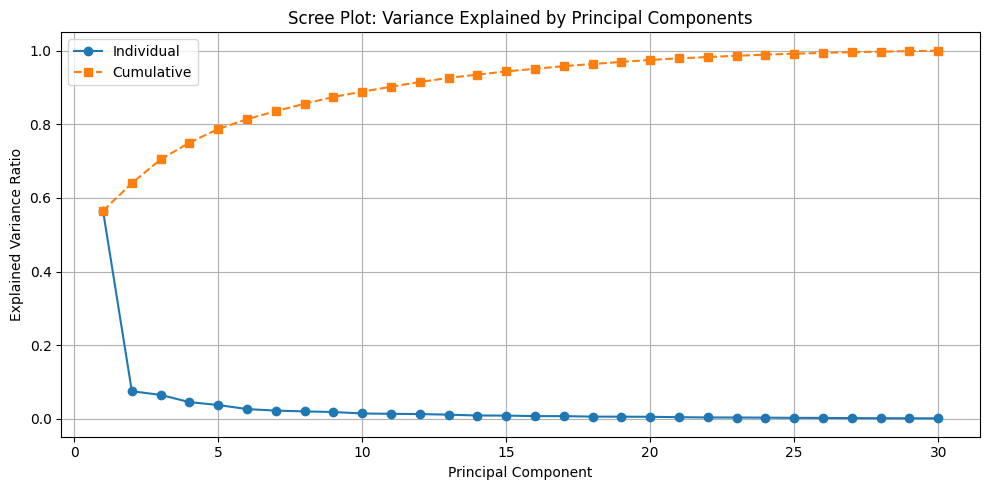

PC1 explains 56.51% of the variance
PC2 explains 7.49% of the variance
PC3 explains 6.48% of the variance


In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

#  Fit PCA on log return data (no need to standardize since log returns are already centered)
pca = PCA()
pca.fit(log_returns)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Individual')
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='s', linestyle='--', label='Cumulative')
plt.title("Scree Plot: Variance Explained by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#  Optional: Print % of variance explained by first 3 PCs
for i in range(3):
    print(f"PC{i+1} explains {explained_variance[i]*100:.2f}% of the variance")

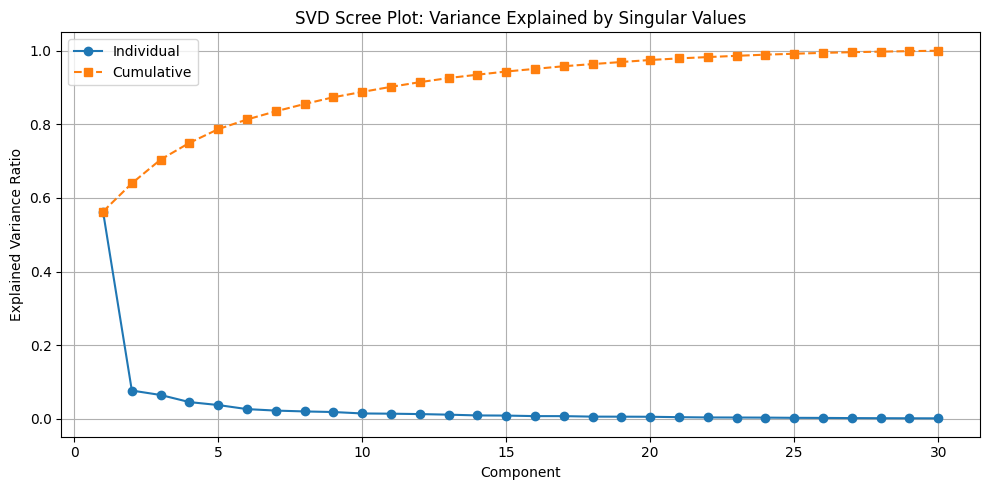

SVD Component 1 explains 56.30% of the variance
SVD Component 2 explains 7.67% of the variance
SVD Component 3 explains 6.46% of the variance


In [7]:
import numpy as np

# Perform SVD
U, S, VT = np.linalg.svd(log_returns, full_matrices=False)

# Normalize singular values to express explained variance
singular_values = S
explained_variance_svd = (S**2) / np.sum(S**2)
cumulative_svd_variance = np.cumsum(explained_variance_svd)

#  Scree Plot (SVD style)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(singular_values)+1), explained_variance_svd, marker='o', label='Individual')
plt.plot(range(1, len(singular_values)+1), cumulative_svd_variance, marker='s', linestyle='--', label='Cumulative')
plt.title("SVD Scree Plot: Variance Explained by Singular Values")
plt.xlabel("Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#  Print % of variance explained by first 3 singular vectors
for i in range(3):
    print(f"SVD Component {i+1} explains {explained_variance_svd[i]*100:.2f}% of the variance")

###  PCA and SVD Analysis of XLK ETF Holdings

After extracting and processing the top 30 holdings of the XLK ETF (as of April 2025), we performed a thorough statistical decomposition of the return structure. This included computing daily log returns (Task c), generating the covariance matrix (Task d), performing Principal Component Analysis (PCA, Task e), and finally, conducting Singular Value Decomposition (SVD, Task f).

### Why Use Returns?

Working with **returns**, particularly **log returns**, is standard in quantitative finance. Returns are **stationary**, unlike prices, making them more suitable for statistical analysis and modeling. They reflect relative changes in value and allow us to understand co-movement between assets without being misled by nominal price differences. Log returns also enable multiplicative chaining over time and are symmetrically distributed under the assumption of Gaussian noise, simplifying downstream modeling.

### PCA vs. SVD: What and Why?

Both **PCA** and **SVD** are tools for identifying structure in high-dimensional data. PCA works by computing the **eigenvectors and eigenvalues** of the **covariance matrix** of the returns. These eigenvectors represent the **principal components** (PCs) — uncorrelated linear combinations of the original variables that explain variance in decreasing order.

In contrast, **SVD** works directly on the data matrix (here, the log returns), decomposing it into orthogonal matrices `U` and `Vᵗ` and a diagonal matrix of **singular values (Σ)**. The squares of singular values are proportional to the eigenvalues of the covariance matrix — this is why the **explained variance ratios** from PCA and SVD are nearly identical.

### Interpreting Our Scree Plots

The scree plots for both PCA and SVD show sharp **dimensional concentration**. The **first principal component (PC1)** explains **56.51%** of the variance, followed by PC2 and PC3, which contribute **7.49%** and **6.48%** respectively. SVD yields nearly identical results: its first component explains **56.30%**, the second **7.67%**, and the third **6.46%**.

This implies that approximately **70% of the movement** in this basket of 30 tech stocks can be captured with just **3 orthogonal factors**. This is typical of sector ETFs, where a few mega-cap names (e.g., AAPL, MSFT, NVDA) dominate both the holdings and the return structure. The dominance of PC1 suggests that XLK behaves much like a **single risk factor**, driven by aggregate market or sector sentiment.

### Eigenvalues, Eigenvectors, and Singular Values

- **Eigenvalues** measure how much variance is explained by each principal component. Large eigenvalues mean the component captures substantial structure.
- **Eigenvectors** (aka loadings) show how each original variable contributes to a principal component. For instance, if PC1 is heavily loaded on AAPL and MSFT, then that component reflects their joint movement.
- **Singular values** are essentially scaled square roots of eigenvalues. Their magnitudes indicate the strength of each component's contribution to the original data matrix.

The near-identical scree plots confirm that PCA and SVD, though operationally different, are **mathematically consistent** when applied to standardized data.

### Takeaway

This analysis underscores the **latent factor structure** of XLK. A large portion of its risk/return behavior can be reduced to a small number of drivers. For portfolio managers, this has implications for diversification, risk budgeting, and hedging: despite being composed of 30 stocks, the ETF may offer far fewer **independent sources of risk** than expected.
